# Ensemble of Kramers chain with excluded volume (EV) and hydrodynamic interactions (HI)



In [1]:
import numpy as np
from dilutebrowniandynamics.simulate import simulate_batch
from dilutebrowniandynamics.molecules.Kramers_chain_EVHI import KramersChainEVHI
from dilutebrowniandynamics.molecules.adaptive_Kramers_chain import AdaptiveKramersChain
from tqdm.notebook import trange

import matplotlib.pyplot as plt

## Parameters definition

In [2]:
n_ensemble = 16     # Number of molecules to simulate
n_links = 100      # Number of segments in the Kramers chain

n_proc = 16         # Number of processor cores to use

output_file = 'outputs/sandpit'

## Initialise molecules
Here we just draw random vectors from a normal distribution and rescale to unit vectors. To do this with call `from_normal_distribution` constructor. For now we set `h_star` to zero.

In [3]:
seq = np.random.SeedSequence(2022)
seeds = seq.spawn(n_ensemble)
# Starting vectors
molecules = [KramersChainEVHI.from_normal_distribution(n_links, h_star=0., EVheight=0., EVsigma=0., seed=seed)
             for seed in seeds]

seq = np.random.SeedSequence(2022)
seeds = seq.spawn(n_ensemble)
# Starting vectors
molecules_free = [AdaptiveKramersChain.from_normal_distribution(n_links, seed=seed)
                  for seed in seeds]

## Initial relaxation
Thermalisation step.

In [4]:
n_steps = 100       # Number of time steps to record
gradU = np.zeros((3, 3))
dt = .01           # Time step value (dimensionless)
simulate_batch(molecules, gradU, dt, n_steps, write_interval=1, n_proc=n_proc);
simulate_batch(molecules_free, gradU, dt, n_steps, write_interval=1, n_proc=n_proc);

Physical time to compute: 1.0
Calculation started on 16 cores.


100%|██████████| 16/16 [00:01<00:00, 11.31it/s]

Physical time to compute: 1.0


Calculation started on 16 cores.


100%|██████████| 16/16 [00:01<00:00, 12.88it/s]


## HI testing

Now we need to set `h_star` back to a non-zero value:

In [5]:
for molecule in molecules:
    molecule.h_star = 0.2

then do another run

In [ ]:
n_steps = 1000       # Number of time steps to record
gradU = np.diag([1., -.5, -.5])
observables, _ = simulate_batch(molecules, gradU, dt, n_steps, write_interval=1, no_average=('g_max', 'i_max', 'g_13', 'g_12', 'g_23'), n_proc=n_proc)
observables_free, _ = simulate_batch(molecules_free, gradU, dt, n_steps, write_interval=1, no_average=('g_max', 'i_max', 'g_13', 'g_12', 'g_23'), n_proc=n_proc)

Physical time to compute: 5.0
Calculation started on 16 cores.


  0%|          | 0/16 [00:00<?, ?it/s]

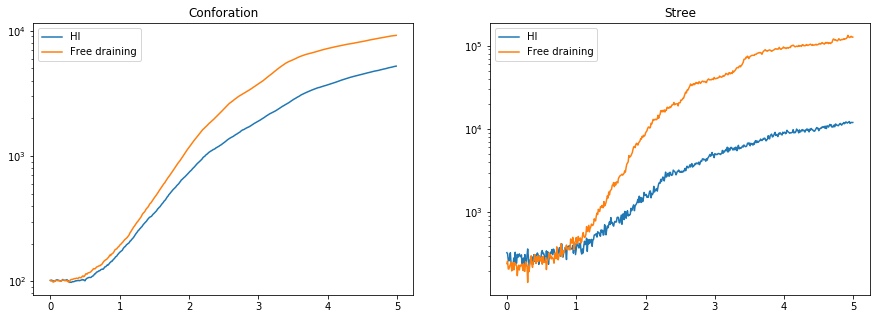

In [7]:
t = np.arange(n_steps)*dt
A = observables['A_average']
trA = np.trace(A, axis1=1, axis2=2)
S = observables['S_average']
trS = np.trace(S, axis1=1, axis2=2)

A_free = observables_free['A_average']
trA_free = np.trace(A_free, axis1=1, axis2=2)
S_free = observables_free['S_average']
trS_free = np.trace(S_free, axis1=1, axis2=2)

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].semilogy(t, trA, label='HI')
ax[0].semilogy(t, trA_free, label='Free draining')
ax[0].set_title('Conforation')
ax[0].legend()

ax[1].semilogy(t, trS, label='HI')
ax[1].semilogy(t, trS_free, label='Free draining')
ax[1].set_title('Stree')
ax[1].legend()

In [9]:
observables

{'A_average': array([[[ 2.44234195e+01,  9.94701826e+00, -3.91363409e+00],
         [ 9.94701826e+00,  2.85111417e+01, -9.26214894e+00],
         [-3.91363409e+00, -9.26214894e+00,  4.86734273e+01]],
 
        [[ 2.51198850e+01,  9.78472387e+00, -3.82126840e+00],
         [ 9.78472387e+00,  2.81353580e+01, -8.63837666e+00],
         [-3.82126840e+00, -8.63837666e+00,  4.78340481e+01]],
 
        [[ 2.60202376e+01,  1.00782873e+01, -3.69454534e+00],
         [ 1.00782873e+01,  2.81004266e+01, -9.03044879e+00],
         [-3.69454534e+00, -9.03044879e+00,  4.80926837e+01]],
 
        ...,
 
        [[ 5.19393733e+03,  1.06485394e+01,  3.25504745e+00],
         [ 1.06485394e+01,  1.23160596e+00,  5.66522306e-02],
         [ 3.25504745e+00,  5.66522306e-02,  9.89021319e-01]],
 
        [[ 5.20931785e+03,  1.15953873e+01,  2.15477574e+00],
         [ 1.15953873e+01,  1.32490653e+00,  2.05647010e-02],
         [ 2.15477574e+00,  2.05647010e-02,  1.02964936e+00]],
 
        [[ 5.21963648e+03, 